# Importing Libraries.

In [8]:
#Exploratory Data Analysis (EDA) Libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Data Manipulation Libraries.
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler

#ML Modelling Libraries.
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Time Libraries.
import time
import timeit

#Notebook Libraries.
import warnings
warnings.filterwarnings('ignore')

In [9]:
def train_and_evaluate(modelname, model, X_train, X_test, y_train, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    model_preds = model.predict(X_test)

    print(f"For: {modelname}")
    print(classification_report(y_true=y_test, y_pred=model_preds))
    print("ROC Curve")
    plot_roc_curve(model, X_test, y_test) 
    plt.show();
    print("\n")
    print(f"RunTime: {end - start} seconds")

In [10]:
def segment_dataset_labelled_and_unlabelled(dataset, percentage):
    
    dataset = dataset.sample(frac = 1, random_state = 42)

    dataset_labelled_train = dataset[:int(0.7 * len(dataset))]
    dataset_labelled_test = dataset[int(0.7 * len(dataset)):]

    if (percentage != 0):
        dataset_unlabelled = dataset_labelled_train[:int((percentage/100) * len(dataset_labelled_train))]
        dataset_labelled_train = dataset_labelled_train[int((percentage/100) * len(dataset_labelled_train)):]
        return dataset_labelled_train, dataset_labelled_test, dataset_unlabelled
    else:
        return dataset_labelled_train, dataset_labelled_test

In [11]:
def standard_scaling_dataset(train_data, test_data, unlabelled_data, cols):
    scaler = StandardScaler()
    train_data[cols] = scaler.fit_transform(train_data[cols])
    test_data[cols] = scaler.transform(test_data[cols])
    unlabelled_data[cols] = scaler.transform(unlabelled_data[cols])

    return train_data, test_data, unlabelled_data

In [12]:
def standard_scaling_dataset_without_unlabelled_data(train_data, test_data, cols):
    scaler = StandardScaler()
    train_data[cols] = scaler.fit_transform(train_data[cols])
    test_data[cols] = scaler.transform(test_data[cols])
    return train_data, test_data

In [13]:
def train_test_unlabelled_split(train_data, test_data, unlabelled_data, target_col_name):
    X_train = train_data.drop(target_col_name, axis = 1)
    y_train = train_data[target_col_name]

    X_test = test_data.drop(target_col_name, axis = 1)
    y_test = test_data[target_col_name]

    unlabelled_data = unlabelled_data.drop(target_col_name, axis = 1)

    len(X_train), len(y_train), len(X_test), len(y_test), len(unlabelled_data)

    print(f"Train Data Length: {len(train_data)}")
    print(f"Test Data Length: {len(heart_dataset_test)}")
    print(f"Unlabelled Data length: {len(unlabelled_data)}")

    return X_train, y_train, X_test, y_test, unlabelled_data

In [14]:
def model_evaluation(modelname, model, X_test, y_test):
    print(f"For Model: {modelname}")
    print("Classification Report")
    model_pred = model.predict(X_test)
    print(classification_report(y_true = y_test, y_pred = model_pred))
    print("ROC Curve")
    print(plot_roc_curve(model, X_test, y_test))

In [15]:
def self_training(model, train_data, test_data, unlabelled_data, target_col_name, k_best = 10):
    count = 1
    while(len(unlabelled_data) != 0):
        X_train, y_train, X_test, y_test, unlabelled_data = train_test_unlabelled_split(
            train_data=train_data, 
            test_data=test_data, 
            unlabelled_data=unlabelled_data, 
            target_col_name=target_col_name)
        print(f"Iteration: {count}, X_train Length: {len(X_train)}, y_train Length: {len(y_train)}, X_test Length: {len(X_test)}, y_test Length: {len(y_test)}, unlabelled_data Length: {len(unlabelled_data)}")
        model.fit(X_train, y_train)
        model_preds = model.predict(unlabelled_data)
        model_pred_probs = model.predict_proba(unlabelled_data)
        max_pred_probs = model.predict_proba(unlabelled_data)
        max_pred_probs = pd.DataFrame(max_pred_probs)
        conf_array = []
        for index, row in max_pred_probs.iterrows():
            conf_array.append(row.max())
    
        unlabelled_data[target_col_name] = model_preds
        unlabelled_data["confidence"] = conf_array
        unlabelled_data = unlabelled_data.sort_values("confidence", ascending = False)

        unlabelled_data_verified = unlabelled_data[:k_best]
        unlabelled_data_verified, len(unlabelled_data_verified)

        unlabelled_data = unlabelled_data[k_best:]
        unlabelled_data = unlabelled_data.drop("confidence", axis = 1)

        train_data = pd.concat([train_data, unlabelled_data_verified])
        train_data = train_data.drop("confidence", axis = 1)
    return model, train_data, test_data, unlabelled_data

# Heart Disease Dataset.

In [16]:
heart_dataset = pd.read_csv("heart.csv")
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Baseline Dataset.

In [17]:
heart_dataset = heart_dataset.sample(frac = 1.0, random_state = 42)
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [18]:
heart_dataset = heart_dataset.drop("chol", axis = 1)
heart_dataset = heart_dataset.drop("fbs", axis = 1)

In [19]:
#Finding Categorical And Continuous Features
categorical_features = []
continuous_features = []
for feature in heart_dataset.columns:
    if len(heart_dataset[feature].unique()) <= 10:
        categorical_features.append(feature)
    else:
        continuous_features.append(feature)

categorical_features, continuous_features

(['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'],
 ['age', 'trestbps', 'thalach', 'oldpeak'])

In [20]:
categorical_features.remove("target")
heart_dataset = pd.get_dummies(heart_dataset, columns=categorical_features)

In [21]:
heart_dataset_train = heart_dataset[:int(0.7 * len(heart_dataset))]
heart_dataset_test = heart_dataset[int(0.7 * len(heart_dataset)):]

len(heart_dataset_train), len(heart_dataset_test)

(212, 91)

In [22]:
scaler = StandardScaler()
cols = ['age', 'trestbps', 'thalach', 'oldpeak']
heart_dataset_train[cols] = scaler.fit_transform(heart_dataset_train[cols])
heart_dataset_test[cols] = scaler.transform(heart_dataset_test[cols])

len(heart_dataset_train), len(heart_dataset_test)

(212, 91)

In [23]:
X_train = heart_dataset_train.drop("target", axis = 1)
y_train = heart_dataset_train["target"]

len(X_train), len(y_train)

(212, 212)

In [24]:
X_test = heart_dataset_test.drop("target", axis = 1)
y_test = heart_dataset_test["target"]

len(X_test), len(y_test)

(91, 91)

For: MLP Classifier Fully Labelled Data
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

ROC Curve


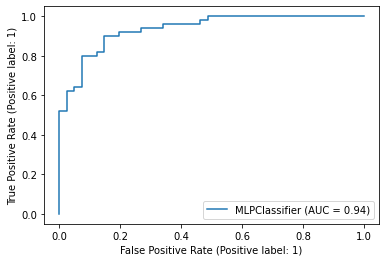



RunTime: 0.6901454925537109 seconds


In [25]:
model = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = 'constant', solver = 'sgd', random_state = 42)
modelname = "MLP Classifier Fully Labelled Data"
train_and_evaluate(modelname, model, X_train, X_test, y_train, y_test)

# Semi-Supervised Learning.(Self Training.)

In [26]:
def heart_dataset_clean():
    heart_dataset = pd.read_csv("heart.csv")
    heart_dataset = heart_dataset.drop("chol", axis = 1)
    heart_dataset = heart_dataset.drop("fbs", axis = 1)
    categorical_features = []
    continuous_features = []
    for feature in heart_dataset.columns:
        if len(heart_dataset[feature].unique()) <= 10:
            categorical_features.append(feature)
        else:
            continuous_features.append(feature)

    categorical_features, continuous_features

    categorical_features.remove("target")
    heart_dataset = pd.get_dummies(heart_dataset, columns=categorical_features)

## 10% Unlabelled Data.

In [27]:
heart_dataset_clean()
dataset_labelled_train, dataset_labelled_test, dataset_unlabelled = segment_dataset_labelled_and_unlabelled(heart_dataset, 10)
train_data, test_data, unlabelled_data = standard_scaling_dataset(dataset_labelled_train, dataset_labelled_test, dataset_unlabelled,cols = ['age', 'trestbps', 'thalach', 'oldpeak'])

In [28]:
model = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = 'constant', solver = 'sgd', random_state = 42)
model, train_data, test_data, unlabelled_data = self_training(model, train_data, test_data, dataset_unlabelled, "target")

Train Data Length: 191
Test Data Length: 91
Unlabelled Data length: 21
Iteration: 1, X_train Length: 191, y_train Length: 191, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 21
Train Data Length: 201
Test Data Length: 91
Unlabelled Data length: 11
Iteration: 1, X_train Length: 201, y_train Length: 201, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 11
Train Data Length: 211
Test Data Length: 91
Unlabelled Data length: 1
Iteration: 1, X_train Length: 211, y_train Length: 211, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 1


In [29]:
len(train_data), len(test_data)

(212, 91)

For Model: MLP Classifier 10% Unlabelled Data.
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.90      0.90      0.90        50

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91

ROC Curve


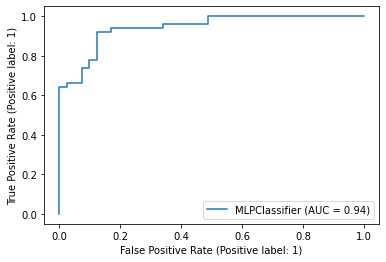

In [30]:
model_evaluation("MLP Classifier 10% Unlabelled Data.", model, X_test, y_test)

## 20% Unlabelled Data.

In [31]:
heart_dataset_clean()
dataset_labelled_train, dataset_labelled_test, dataset_unlabelled = segment_dataset_labelled_and_unlabelled(heart_dataset, 20)
train_data, test_data, unlabelled_data = standard_scaling_dataset(dataset_labelled_train, dataset_labelled_test, dataset_unlabelled,cols = ['age', 'trestbps', 'thalach', 'oldpeak'])

In [32]:
model = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = 'constant', solver = 'sgd', random_state = 42)
model, train_data, test_data, unlabelled_data = self_training(model, train_data, test_data, unlabelled_data, "target")

Train Data Length: 170
Test Data Length: 91
Unlabelled Data length: 42
Iteration: 1, X_train Length: 170, y_train Length: 170, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 42
Train Data Length: 180
Test Data Length: 91
Unlabelled Data length: 32
Iteration: 1, X_train Length: 180, y_train Length: 180, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 32
Train Data Length: 190
Test Data Length: 91
Unlabelled Data length: 22
Iteration: 1, X_train Length: 190, y_train Length: 190, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 22
Train Data Length: 200
Test Data Length: 91
Unlabelled Data length: 12
Iteration: 1, X_train Length: 200, y_train Length: 200, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 12
Train Data Length: 210
Test Data Length: 91
Unlabelled Data length: 2
Iteration: 1, X_train Length: 210, y_train Length: 210, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 2


For Model: MLP Classifier 20% Unlabelled Data.
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.83      0.87        41
           1       0.87      0.94      0.90        50

    accuracy                           0.89        91
   macro avg       0.89      0.88      0.89        91
weighted avg       0.89      0.89      0.89        91

ROC Curve


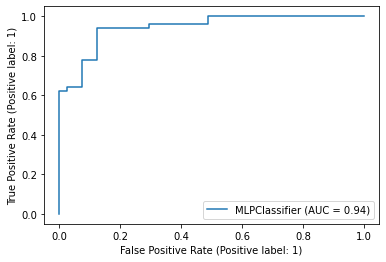

In [33]:
model_evaluation("MLP Classifier 20% Unlabelled Data.", model, X_test, y_test)

## 50% Unlabelled Data.

In [34]:
heart_dataset_clean()
dataset_labelled_train, dataset_labelled_test, dataset_unlabelled = segment_dataset_labelled_and_unlabelled(heart_dataset, 50)
train_data, test_data, unlabelled_data = standard_scaling_dataset(dataset_labelled_train, dataset_labelled_test, dataset_unlabelled,cols = ['age', 'trestbps', 'thalach', 'oldpeak'])

In [35]:
model = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = 'constant', solver = 'sgd', random_state = 42)
model, train_data, test_data, unlabelled_data = self_training(model, train_data, test_data, unlabelled_data, "target")

Train Data Length: 106
Test Data Length: 91
Unlabelled Data length: 106
Iteration: 1, X_train Length: 106, y_train Length: 106, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 106
Train Data Length: 116
Test Data Length: 91
Unlabelled Data length: 96
Iteration: 1, X_train Length: 116, y_train Length: 116, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 96
Train Data Length: 126
Test Data Length: 91
Unlabelled Data length: 86
Iteration: 1, X_train Length: 126, y_train Length: 126, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 86
Train Data Length: 136
Test Data Length: 91
Unlabelled Data length: 76
Iteration: 1, X_train Length: 136, y_train Length: 136, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 76
Train Data Length: 146
Test Data Length: 91
Unlabelled Data length: 66
Iteration: 1, X_train Length: 146, y_train Length: 146, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 66
Train Data Length: 156
Test Data Lengt

For Model: MLP Classifier 50% Unlabelled Data.
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        41
           1       0.85      0.80      0.82        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

ROC Curve


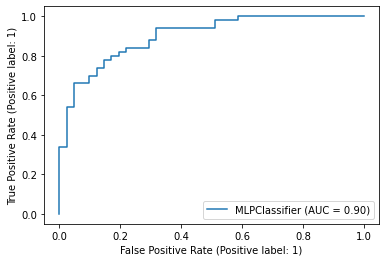

In [36]:
model_evaluation("MLP Classifier 50% Unlabelled Data.", model, X_test, y_test)

## 90% Unlabelled Data.

In [37]:
heart_dataset_clean()
dataset_labelled_train, dataset_labelled_test, dataset_unlabelled = segment_dataset_labelled_and_unlabelled(heart_dataset, 90)
train_data, test_data, unlabelled_data = standard_scaling_dataset(dataset_labelled_train, dataset_labelled_test, dataset_unlabelled,cols = ['age', 'trestbps', 'thalach', 'oldpeak'])

In [38]:
model = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = 'constant', solver = 'sgd', random_state = 42)
model, train_data, test_data, unlabelled_data = self_training(model, train_data, test_data, unlabelled_data, "target")

Train Data Length: 22
Test Data Length: 91
Unlabelled Data length: 190
Iteration: 1, X_train Length: 22, y_train Length: 22, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 190
Train Data Length: 32
Test Data Length: 91
Unlabelled Data length: 180
Iteration: 1, X_train Length: 32, y_train Length: 32, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 180
Train Data Length: 42
Test Data Length: 91
Unlabelled Data length: 170
Iteration: 1, X_train Length: 42, y_train Length: 42, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 170
Train Data Length: 52
Test Data Length: 91
Unlabelled Data length: 160
Iteration: 1, X_train Length: 52, y_train Length: 52, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 160
Train Data Length: 62
Test Data Length: 91
Unlabelled Data length: 150
Iteration: 1, X_train Length: 62, y_train Length: 62, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 150
Train Data Length: 72
Test Data Length: 91
Un

For Model: MLP Classifier 90% Unlabelled Data.
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.66      0.70        41
           1       0.75      0.82      0.78        50

    accuracy                           0.75        91
   macro avg       0.75      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91

ROC Curve


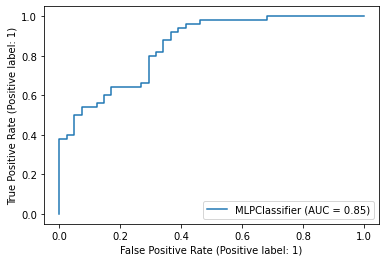

In [39]:
model_evaluation("MLP Classifier 90% Unlabelled Data.", model, X_test, y_test)

## 95% Unlabelled Data.

In [40]:
heart_dataset_clean()
dataset_labelled_train, dataset_labelled_test, dataset_unlabelled = segment_dataset_labelled_and_unlabelled(heart_dataset, 95)
train_data, test_data, unlabelled_data = standard_scaling_dataset(dataset_labelled_train, dataset_labelled_test, dataset_unlabelled,cols = ['age', 'trestbps', 'thalach', 'oldpeak'])

In [41]:
model = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = 'constant', solver = 'sgd', random_state = 42)
model, train_data, test_data, unlabelled_data = self_training(model, train_data, test_data, unlabelled_data, "target")

Train Data Length: 11
Test Data Length: 91
Unlabelled Data length: 201
Iteration: 1, X_train Length: 11, y_train Length: 11, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 201
Train Data Length: 21
Test Data Length: 91
Unlabelled Data length: 191
Iteration: 1, X_train Length: 21, y_train Length: 21, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 191
Train Data Length: 31
Test Data Length: 91
Unlabelled Data length: 181
Iteration: 1, X_train Length: 31, y_train Length: 31, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 181
Train Data Length: 41
Test Data Length: 91
Unlabelled Data length: 171
Iteration: 1, X_train Length: 41, y_train Length: 41, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 171
Train Data Length: 51
Test Data Length: 91
Unlabelled Data length: 161
Iteration: 1, X_train Length: 51, y_train Length: 51, X_test Length: 91, y_test Length: 91, unlabelled_data Length: 161
Train Data Length: 61
Test Data Length: 91
Un

For Model: MLP Classifier 95% Unlabelled Data.
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        41
           1       0.76      0.70      0.73        50

    accuracy                           0.71        91
   macro avg       0.71      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91

ROC Curve


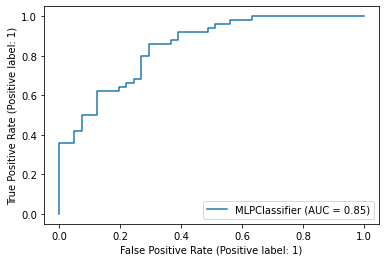

In [42]:
model_evaluation("MLP Classifier 95% Unlabelled Data.", model, X_test, y_test)

# Marketing Dataset.

In [43]:
!pip install openpyxl
customer = pd.read_excel("marketing_campaign.xlsx")
customer

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [44]:
customer.loc[(customer['Income'].isnull() == True), 'Income'] = customer['Income'].median()   

In [45]:
customer["Age"] = 2021 - customer["Year_Birth"]
customer.drop("Year_Birth", axis = 1, inplace = True)
customer.isna().sum()

ID                     0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

In [46]:
customer["Expense"] = customer["MntWines"]+ customer["MntFruits"]+ customer["MntMeatProducts"]+ customer["MntFishProducts"]+ customer["MntSweetProducts"]+ customer["MntGoldProds"]
customer

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Expense
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,3,11,1,64,1617
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,3,11,0,67,27
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,3,11,0,56,776
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,3,11,0,37,53
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,3,11,0,40,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,3,11,0,54,1341
2236,4001,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,0,0,1,0,0,3,11,0,75,444
2237,7270,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,1,0,0,0,0,3,11,0,40,1241
2238,8235,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,3,11,0,65,843


In [47]:
customer['Kids'] = customer['Kidhome'] + customer['Teenhome']
customer['Expenses'] = customer['MntWines'] + customer['MntFruits'] + customer['MntMeatProducts'] + customer['MntFishProducts'] + customer['MntSweetProducts'] + customer['MntGoldProds']
customer

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Expense,Kids,Expenses
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,3,11,1,64,1617,0,1617
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,3,11,0,67,27,2,27
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,3,11,0,56,776,0,776
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,3,11,0,37,53,1,53
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,3,11,0,40,422,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,3,11,0,54,1341,1,1341
2236,4001,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,1,0,0,3,11,0,75,444,3,444
2237,7270,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,3,11,0,40,1241,0,1241
2238,8235,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,3,11,0,65,843,1,843


In [48]:
customer['Marital_Status'] = customer['Marital_Status'].str.replace('Married', 'In relationship')
customer['Marital_Status'] = customer['Marital_Status'].str.replace('Together', 'In relationship')
customer['Marital_Status'] = customer['Marital_Status'].str.replace('Divorced', 'Single')
customer['Marital_Status'] = customer['Marital_Status'].str.replace('Widow', 'Single')
customer['Marital_Status'] = customer['Marital_Status'].str.replace('Absurd', 'Single')
customer['Marital_Status'] = customer['Marital_Status'].str.replace('Alone', 'Single')
customer['Marital_Status'] = customer['Marital_Status'].str.replace('YOLO', 'Single')
customer

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Expense,Kids,Expenses
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,3,11,1,64,1617,0,1617
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,3,11,0,67,27,2,27
2,4141,Graduation,In relationship,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,3,11,0,56,776,0,776
3,6182,Graduation,In relationship,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,3,11,0,37,53,1,53
4,5324,PhD,In relationship,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,3,11,0,40,422,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,In relationship,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,3,11,0,54,1341,1,1341
2236,4001,PhD,In relationship,64014.0,2,1,2014-06-10,56,406,0,...,1,0,0,3,11,0,75,444,3,444
2237,7270,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,3,11,0,40,1241,0,1241
2238,8235,Master,In relationship,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,3,11,0,65,843,1,843


In [49]:
customer['Education'] = customer['Education'].str.replace('2n Cycle', 'Master') 
customer

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Expense,Kids,Expenses
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,3,11,1,64,1617,0,1617
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,3,11,0,67,27,2,27
2,4141,Graduation,In relationship,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,3,11,0,56,776,0,776
3,6182,Graduation,In relationship,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,3,11,0,37,53,1,53
4,5324,PhD,In relationship,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,3,11,0,40,422,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,In relationship,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,3,11,0,54,1341,1,1341
2236,4001,PhD,In relationship,64014.0,2,1,2014-06-10,56,406,0,...,1,0,0,3,11,0,75,444,3,444
2237,7270,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,3,11,0,40,1241,0,1241
2238,8235,Master,In relationship,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,3,11,0,65,843,1,843


In [50]:
customer['Dt_Customer'] = pd.to_datetime(customer.Dt_Customer)
customer['Date_Collected'] = '01-01-2015'
customer['Date_Collected'] = pd.to_datetime(customer.Date_Collected)
customer['Time_Enrolled_Days'] = (customer['Date_Collected'] - customer['Dt_Customer']).dt.days
customer

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Expense,Kids,Expenses,Date_Collected,Time_Enrolled_Days
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,3,11,1,64,1617,0,1617,2015-01-01,849
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,3,11,0,67,27,2,27,2015-01-01,299
2,4141,Graduation,In relationship,71613.0,0,0,2013-08-21,26,426,49,...,0,3,11,0,56,776,0,776,2015-01-01,498
3,6182,Graduation,In relationship,26646.0,1,0,2014-02-10,26,11,4,...,0,3,11,0,37,53,1,53,2015-01-01,325
4,5324,PhD,In relationship,58293.0,1,0,2014-01-19,94,173,43,...,0,3,11,0,40,422,1,422,2015-01-01,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,In relationship,61223.0,0,1,2013-06-13,46,709,43,...,0,3,11,0,54,1341,1,1341,2015-01-01,567
2236,4001,PhD,In relationship,64014.0,2,1,2014-06-10,56,406,0,...,0,3,11,0,75,444,3,444,2015-01-01,205
2237,7270,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,...,0,3,11,0,40,1241,0,1241,2015-01-01,341
2238,8235,Master,In relationship,69245.0,0,1,2014-01-24,8,428,30,...,0,3,11,0,65,843,1,843,2015-01-01,342


In [51]:
customer = customer.drop(columns=[
       'ID', 'Dt_Customer', 'Kidhome', 'Recency', 'NumDealsPurchases', 
       'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Date_Collected'
       ])
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Education           2240 non-null   object 
 1   Marital_Status      2240 non-null   object 
 2   Income              2240 non-null   float64
 3   Teenhome            2240 non-null   int64  
 4   MntWines            2240 non-null   int64  
 5   MntFruits           2240 non-null   int64  
 6   MntMeatProducts     2240 non-null   int64  
 7   MntFishProducts     2240 non-null   int64  
 8   MntSweetProducts    2240 non-null   int64  
 9   MntGoldProds        2240 non-null   int64  
 10  Age                 2240 non-null   int64  
 11  Expense             2240 non-null   int64  
 12  Kids                2240 non-null   int64  
 13  Expenses            2240 non-null   int64  
 14  Time_Enrolled_Days  2240 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 262.6

In [52]:
categorical_features = ['Education', 'Marital_Status']

customer = pd.get_dummies(customer, columns=categorical_features)
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Income                          2240 non-null   float64
 1   Teenhome                        2240 non-null   int64  
 2   MntWines                        2240 non-null   int64  
 3   MntFruits                       2240 non-null   int64  
 4   MntMeatProducts                 2240 non-null   int64  
 5   MntFishProducts                 2240 non-null   int64  
 6   MntSweetProducts                2240 non-null   int64  
 7   MntGoldProds                    2240 non-null   int64  
 8   Age                             2240 non-null   int64  
 9   Expense                         2240 non-null   int64  
 10  Kids                            2240 non-null   int64  
 11  Expenses                        2240 non-null   int64  
 12  Time_Enrolled_Days              22

In [53]:
customer

,Income,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Expense,Kids,Expenses,Time_Enrolled_Days,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_In relationship,Marital_Status_Single
0,58138.0,0,635,88,546,172,88,88,64,1617,0,1617,849,0,1,0,0,0,1
1,46344.0,1,11,1,6,2,1,6,67,27,2,27,299,0,1,0,0,0,1
2,71613.0,0,426,49,127,111,21,42,56,776,0,776,498,0,1,0,0,1,0
3,26646.0,0,11,4,20,10,3,5,37,53,1,53,325,0,1,0,0,1,0
4,58293.0,0,173,43,118,46,27,15,40,422,1,422,347,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,1,709,43,182,42,118,247,54,1341,1,1341,567,0,1,0,0,1,0
2236,64014.0,1,406,0,30,0,0,8,75,444,3,444,205,0,0,0,1,1,0
2237,56981.0,0,908,48,217,32,12,24,40,1241,0,1241,341,0,1,0,0,0,1
2238,69245.0,1,428,30,214,80,30,61,65,843,1,843,342,0,0,1,0,1,0


In [54]:
customer = customer[customer["Age"] < 90]
customer
customer["Teenhome"] = np.where(customer.Teenhome> 0, 1, 0)
customer

,Income,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Expense,Kids,Expenses,Time_Enrolled_Days,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_In relationship,Marital_Status_Single
0,58138.0,0,635,88,546,172,88,88,64,1617,0,1617,849,0,1,0,0,0,1
1,46344.0,1,11,1,6,2,1,6,67,27,2,27,299,0,1,0,0,0,1
2,71613.0,0,426,49,127,111,21,42,56,776,0,776,498,0,1,0,0,1,0
3,26646.0,0,11,4,20,10,3,5,37,53,1,53,325,0,1,0,0,1,0
4,58293.0,0,173,43,118,46,27,15,40,422,1,422,347,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,1,709,43,182,42,118,247,54,1341,1,1341,567,0,1,0,0,1,0
2236,64014.0,1,406,0,30,0,0,8,75,444,3,444,205,0,0,0,1,1,0
2237,56981.0,0,908,48,217,32,12,24,40,1241,0,1241,341,0,1,0,0,0,1
2238,69245.0,1,428,30,214,80,30,61,65,843,1,843,342,0,0,1,0,1,0


# Baseline Dataset.

In [55]:
dataset_labelled_train, dataset_labelled_test = segment_dataset_labelled_and_unlabelled(customer, 0)

In [56]:
dataset_labelled_train

,Income,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Expense,Kids,Expenses,Time_Enrolled_Days,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_In relationship,Marital_Status_Single
1755,16014.0,1,3,9,4,7,8,7,42,38,2,38,655,1,0,0,0,0,1
370,35684.0,0,10,4,7,0,6,3,37,30,1,30,254,0,0,1,0,1,0
1250,69969.0,0,882,29,514,38,29,44,56,1536,0,1536,492,0,0,0,1,1,0
852,82347.0,0,556,54,845,202,133,63,64,1853,0,1853,786,0,0,1,0,1,0
1750,63342.0,1,918,21,118,13,10,21,60,1101,1,1101,807,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,70596.0,0,347,44,534,17,0,26,36,968,0,968,818,0,1,0,0,0,1
1888,76532.0,1,355,30,177,90,138,30,46,820,2,820,479,0,1,0,0,1,0
655,153924.0,0,1,1,1,1,1,1,46,6,0,6,328,0,1,0,0,0,1
172,50447.0,0,85,7,24,2,3,27,51,148,2,148,255,0,1,0,0,1,0


In [57]:
dataset_labelled_test

,Income,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Expense,Kids,Expenses,Time_Enrolled_Days,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_In relationship,Marital_Status_Single
1152,7500.0,1,5,2,3,3,0,5,42,18,1,18,855,0,1,0,0,1,0
38,42429.0,1,55,0,6,2,0,4,48,67,1,67,324,0,1,0,0,0,1
1557,31859.0,0,3,1,3,8,0,5,45,20,1,20,566,0,1,0,0,0,1
716,87305.0,0,345,25,501,63,138,80,61,1152,0,1152,830,0,0,1,0,0,1
90,51381.5,1,230,42,192,49,37,53,64,603,3,603,773,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,64140.0,1,1459,0,61,0,15,215,57,1750,2,1750,465,0,0,0,1,0,1
1098,27590.0,0,6,0,5,0,0,1,39,12,1,12,618,0,0,1,0,1,0
1133,85606.0,1,717,42,864,219,30,84,45,1956,1,1956,780,0,1,0,0,1,0
1297,57811.0,1,545,7,114,37,21,78,55,802,1,802,556,0,1,0,0,1,0


In [58]:
cols = dataset_labelled_train.columns
cols = list(cols)
cols.remove("Teenhome")
cols

['Income',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'Age',
 'Expense',
 'Kids',
 'Expenses',
 'Time_Enrolled_Days',
 'Education_Basic',
 'Education_Graduation',
 'Education_Master',
 'Education_PhD',
 'Marital_Status_In relationship',
 'Marital_Status_Single']

In [59]:
train_data, test_data = standard_scaling_dataset_without_unlabelled_data(dataset_labelled_train, dataset_labelled_test, cols)

In [60]:
train_data

,Income,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Expense,Kids,Expenses,Time_Enrolled_Days,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_In relationship,Marital_Status_Single
1755,-1.388253,1,-0.906313,-0.438198,-0.730074,-0.563280,-0.469212,-0.711805,-0.861536,-0.952861,1.438732,-0.952861,0.579003,6.426297,-1.014806,-0.584975,-0.521879,-1.373846,1.373846
370,-0.643420,0,-0.885683,-0.562365,-0.716782,-0.693814,-0.516870,-0.787746,-1.296081,-0.966065,0.085598,-0.966065,-1.423984,-0.155611,-1.014806,1.709475,-0.521879,0.727883,-0.727883
1250,0.654830,0,1.684247,0.058474,1.529511,0.014799,0.031199,-0.009353,0.355188,1.519502,-1.267536,1.519502,-0.235179,-0.155611,-1.014806,-0.584975,1.916153,0.727883,-0.727883
852,1.123541,0,0.723470,0.679313,2.996026,3.073021,2.509420,0.351366,1.050459,2.042692,-1.267536,2.042692,1.233345,-0.155611,-1.014806,1.709475,-0.521879,0.727883,-0.727883
1750,0.403890,1,1.790345,-0.140195,-0.224990,-0.451393,-0.421553,-0.446013,0.702824,0.801559,0.085598,0.801559,1.338239,-0.155611,-1.014806,-0.584975,1.916153,0.727883,-0.727883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,0.678573,0,0.107512,0.430978,1.618122,-0.376803,-0.659844,-0.351087,-1.382990,0.582050,-1.267536,0.582050,1.393184,-0.155611,0.985410,-0.584975,-0.521879,-1.373846,1.373846
1888,0.903348,1,0.131090,0.083308,0.036413,0.984479,2.628566,-0.275146,-0.513901,0.337785,1.438732,0.337785,-0.300114,-0.155611,0.985410,-0.584975,-0.521879,0.727883,-0.727883
655,3.833906,0,-0.912207,-0.636866,-0.743366,-0.675166,-0.636015,-0.825717,-0.513901,-1.005675,-1.267536,-1.005675,-1.054355,-0.155611,0.985410,-0.584975,-0.521879,-1.373846,1.373846
172,-0.084398,0,-0.664645,-0.487865,-0.641463,-0.656518,-0.588357,-0.332101,-0.079356,-0.771312,1.438732,-0.771312,-1.418989,-0.155611,0.985410,-0.584975,-0.521879,0.727883,-0.727883


In [61]:
test_data

,Income,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Expense,Kids,Expenses,Time_Enrolled_Days,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_In relationship,Marital_Status_Single
1152,-1.710647,1,-0.900419,-0.612033,-0.734504,-0.637870,-0.659844,-0.749776,-0.861536,-0.985870,0.085598,-0.985870,1.577998,-0.155611,0.985410,-0.584975,-0.521879,0.727883,-0.727883
38,-0.388011,1,-0.753060,-0.661700,-0.721213,-0.656518,-0.659844,-0.768761,-0.340083,-0.904998,0.085598,-0.904998,-1.074335,-0.155611,0.985410,-0.584975,-0.521879,-1.373846,1.373846
1557,-0.788259,0,-0.906313,-0.636866,-0.734504,-0.544632,-0.659844,-0.749776,-0.600810,-0.982569,0.085598,-0.982569,0.134449,-0.155611,0.985410,-0.584975,-0.521879,-1.373846,1.373846
716,1.311283,0,0.101618,-0.040860,1.471914,0.480991,2.628566,0.674114,0.789732,0.885732,-1.267536,0.885732,1.453124,-0.155611,-1.014806,1.709475,-0.521879,-1.373846,1.373846
90,-0.049012,1,-0.237306,0.381310,0.102871,0.219924,0.221831,0.161514,1.050459,-0.020361,2.791866,-0.020361,1.168410,-0.155611,-1.014806,-0.584975,1.916153,0.727883,-0.727883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,0.434107,1,3.384762,-0.661700,-0.477532,-0.693814,-0.302408,3.237116,0.442097,1.872696,1.438732,1.872696,-0.370043,-0.155611,-1.014806,-0.584975,1.916153,-1.373846,1.373846
1098,-0.949911,0,-0.897472,-0.661700,-0.725643,-0.693814,-0.659844,-0.825717,-1.122263,-0.995773,0.085598,-0.995773,0.394188,-0.155611,-1.014806,1.709475,-0.521879,0.727883,-0.727883
1133,1.246948,1,1.197964,0.381310,3.080206,3.390032,0.055028,0.750055,-0.600810,2.212688,0.085598,2.212688,1.203375,-0.155611,0.985410,-0.584975,-0.521879,0.727883,-0.727883
1297,0.194450,1,0.691051,-0.487865,-0.242712,-0.003849,-0.159434,0.636144,0.268279,0.308077,0.085598,0.308077,0.084500,-0.155611,0.985410,-0.584975,-0.521879,0.727883,-0.727883


In [62]:
X_train = train_data.drop("Teenhome", axis = 1)
X_test = test_data.drop("Teenhome", axis = 1)

y_train = train_data["Teenhome"]
y_test = test_data["Teenhome"]

In [63]:
model = RandomForestClassifier(max_depth = 15, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100, random_state = 42)

For: RandomForestClassifier No Unlabelled Data
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       337
           1       0.96      0.96      0.96       335

    accuracy                           0.96       672
   macro avg       0.96      0.96      0.96       672
weighted avg       0.96      0.96      0.96       672

ROC Curve


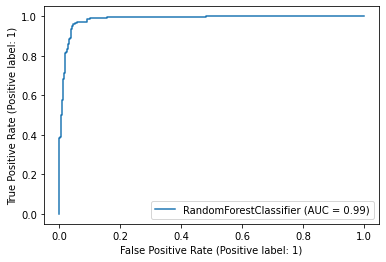



RunTime: 0.25028562545776367 seconds


In [64]:
train_and_evaluate("RandomForestClassifier No Unlabelled Data", model, X_train, X_test, y_train, y_test)

In [65]:
def marketing_dataset_clean():
    customer = pd.read_excel("marketing_campaign.xlsx")
    customer.loc[(customer['Income'].isnull() == True), 'Income'] = customer['Income'].median()   
    customer["Age"] = 2021 - customer["Year_Birth"]
    customer.drop("Year_Birth", axis = 1, inplace = True)
    customer.isna().sum()
    customer["Expense"] = customer["MntWines"]+ customer["MntFruits"]+ customer["MntMeatProducts"]+ customer["MntFishProducts"]+ customer["MntSweetProducts"]+ customer["MntGoldProds"]
    customer['Kids'] = customer['Kidhome'] + customer['Teenhome']
    customer['Expenses'] = customer['MntWines'] + customer['MntFruits'] + customer['MntMeatProducts'] + customer['MntFishProducts'] + customer['MntSweetProducts'] + customer['MntGoldProds']
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('Married', 'In relationship')
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('Together', 'In relationship')
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('Divorced', 'Single')
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('Widow', 'Single')
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('Absurd', 'Single')
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('Alone', 'Single')
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('YOLO', 'Single')
    customer['Education'] = customer['Education'].str.replace('2n Cycle', 'Master') 
    customer['Dt_Customer'] = pd.to_datetime(customer.Dt_Customer)
    customer['Date_Collected'] = '01-01-2015'
    customer['Date_Collected'] = pd.to_datetime(customer.Date_Collected)
    customer['Time_Enrolled_Days'] = (customer['Date_Collected'] - customer['Dt_Customer']).dt.days
    customer = customer.drop(columns=[
       'ID', 'Dt_Customer', 'Kidhome', 'Recency', 'NumDealsPurchases', 
       'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Date_Collected'
       ])
    categorical_features = ['Education', 'Marital_Status']
    customer = pd.get_dummies(customer, columns=categorical_features)
    customer = customer[customer["Age"] < 90]
    customer["Teenhome"] = np.where(customer.Teenhome> 0, 1, 0)


# 10 % unlabelled Data.

In [66]:
marketing_dataset_clean()
dataset_labelled_train, dataset_labelled_test, dataset_unlabelled = segment_dataset_labelled_and_unlabelled(customer, 10)
cols = dataset_labelled_train.columns
cols = list(cols)
cols.remove("Teenhome")
cols
train_data, test_data, unlabelled_data = standard_scaling_dataset(dataset_labelled_train, dataset_labelled_test, dataset_unlabelled,cols)

In [67]:
model = RandomForestClassifier(max_depth = 15, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100, random_state = 42)
model, train_data, test_data, unlabelled_data = self_training(model, train_data, test_data, dataset_unlabelled, "Teenhome")

Train Data Length: 1409
Test Data Length: 91
Unlabelled Data length: 156
Iteration: 1, X_train Length: 1409, y_train Length: 1409, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 156
Train Data Length: 1419
Test Data Length: 91
Unlabelled Data length: 146
Iteration: 1, X_train Length: 1419, y_train Length: 1419, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 146
Train Data Length: 1429
Test Data Length: 91
Unlabelled Data length: 136
Iteration: 1, X_train Length: 1429, y_train Length: 1429, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 136
Train Data Length: 1439
Test Data Length: 91
Unlabelled Data length: 126
Iteration: 1, X_train Length: 1439, y_train Length: 1439, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 126
Train Data Length: 1449
Test Data Length: 91
Unlabelled Data length: 116
Iteration: 1, X_train Length: 1449, y_train Length: 1449, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 116
Train

In [68]:
len(X_train), len(X_test)

(1565, 672)

For Model: Random Forest Classifier 10% Unlabelled Data.
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       337
           1       0.95      0.95      0.95       335

    accuracy                           0.95       672
   macro avg       0.95      0.95      0.95       672
weighted avg       0.95      0.95      0.95       672

ROC Curve


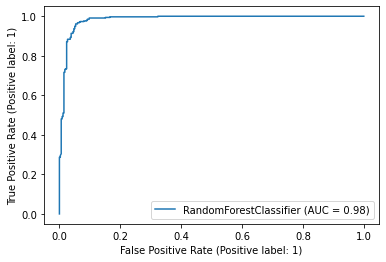

In [69]:
model_evaluation("Random Forest Classifier 10% Unlabelled Data.", model, X_test, y_test)

# 20 %  Unlabelled Data.

In [70]:
marketing_dataset_clean()
dataset_labelled_train, dataset_labelled_test, dataset_unlabelled = segment_dataset_labelled_and_unlabelled(customer, 20)
cols = dataset_labelled_train.columns
cols = list(cols)
cols.remove("Teenhome")
cols
train_data, test_data, unlabelled_data = standard_scaling_dataset(dataset_labelled_train, dataset_labelled_test, dataset_unlabelled,cols)

In [71]:
model = RandomForestClassifier(max_depth = 15, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100, random_state = 42)
model, train_data, test_data, unlabelled_data = self_training(model, train_data, test_data, dataset_unlabelled, "Teenhome")

Train Data Length: 1252
Test Data Length: 91
Unlabelled Data length: 313
Iteration: 1, X_train Length: 1252, y_train Length: 1252, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 313
Train Data Length: 1262
Test Data Length: 91
Unlabelled Data length: 303
Iteration: 1, X_train Length: 1262, y_train Length: 1262, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 303
Train Data Length: 1272
Test Data Length: 91
Unlabelled Data length: 293
Iteration: 1, X_train Length: 1272, y_train Length: 1272, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 293
Train Data Length: 1282
Test Data Length: 91
Unlabelled Data length: 283
Iteration: 1, X_train Length: 1282, y_train Length: 1282, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 283
Train Data Length: 1292
Test Data Length: 91
Unlabelled Data length: 273
Iteration: 1, X_train Length: 1292, y_train Length: 1292, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 273
Train

For Model: Random Forest Classifier 20% Unlabelled Data.
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       337
           1       0.95      0.95      0.95       335

    accuracy                           0.95       672
   macro avg       0.95      0.95      0.95       672
weighted avg       0.95      0.95      0.95       672

ROC Curve


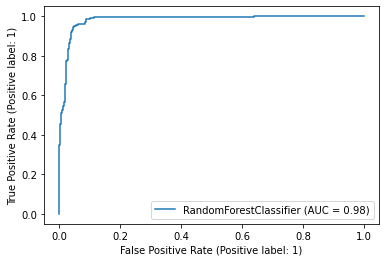

In [72]:
model_evaluation("Random Forest Classifier 20% Unlabelled Data.", model, X_test, y_test)

# 50% Unlabelled Data

In [73]:
marketing_dataset_clean()
dataset_labelled_train, dataset_labelled_test, dataset_unlabelled = segment_dataset_labelled_and_unlabelled(customer, 50)
cols = dataset_labelled_train.columns
cols = list(cols)
cols.remove("Teenhome")
cols
train_data, test_data, unlabelled_data = standard_scaling_dataset(dataset_labelled_train, dataset_labelled_test, dataset_unlabelled,cols)

In [74]:
model = RandomForestClassifier(max_depth = 15, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100, random_state = 42)
model, train_data, test_data, unlabelled_data = self_training(model, train_data, test_data, dataset_unlabelled, "Teenhome")

Train Data Length: 783
Test Data Length: 91
Unlabelled Data length: 782
Iteration: 1, X_train Length: 783, y_train Length: 783, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 782
Train Data Length: 793
Test Data Length: 91
Unlabelled Data length: 772
Iteration: 1, X_train Length: 793, y_train Length: 793, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 772
Train Data Length: 803
Test Data Length: 91
Unlabelled Data length: 762
Iteration: 1, X_train Length: 803, y_train Length: 803, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 762
Train Data Length: 813
Test Data Length: 91
Unlabelled Data length: 752
Iteration: 1, X_train Length: 813, y_train Length: 813, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 752
Train Data Length: 823
Test Data Length: 91
Unlabelled Data length: 742
Iteration: 1, X_train Length: 823, y_train Length: 823, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 742
Train Data Length: 8

Train Data Length: 1203
Test Data Length: 91
Unlabelled Data length: 362
Iteration: 1, X_train Length: 1203, y_train Length: 1203, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 362
Train Data Length: 1213
Test Data Length: 91
Unlabelled Data length: 352
Iteration: 1, X_train Length: 1213, y_train Length: 1213, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 352
Train Data Length: 1223
Test Data Length: 91
Unlabelled Data length: 342
Iteration: 1, X_train Length: 1223, y_train Length: 1223, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 342
Train Data Length: 1233
Test Data Length: 91
Unlabelled Data length: 332
Iteration: 1, X_train Length: 1233, y_train Length: 1233, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 332
Train Data Length: 1243
Test Data Length: 91
Unlabelled Data length: 322
Iteration: 1, X_train Length: 1243, y_train Length: 1243, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 322
Train

For Model: Random Forest Classifier 50% Unlabelled Data.
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       337
           1       0.93      0.95      0.94       335

    accuracy                           0.94       672
   macro avg       0.94      0.94      0.94       672
weighted avg       0.94      0.94      0.94       672

ROC Curve


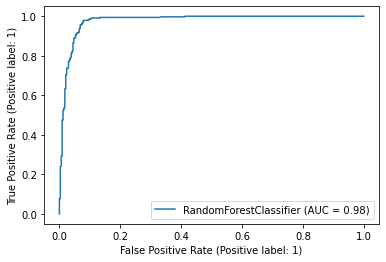

In [75]:
model_evaluation("Random Forest Classifier 50% Unlabelled Data.", model, X_test, y_test)

# 90% Unlabelled Data

In [76]:
marketing_dataset_clean()
dataset_labelled_train, dataset_labelled_test, dataset_unlabelled = segment_dataset_labelled_and_unlabelled(customer, 90)
cols = dataset_labelled_train.columns
cols = list(cols)
cols.remove("Teenhome")
cols
train_data, test_data, unlabelled_data = standard_scaling_dataset(dataset_labelled_train, dataset_labelled_test, dataset_unlabelled,cols)

In [77]:
model = RandomForestClassifier(max_depth = 15, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100, random_state = 42)
model, train_data, test_data, unlabelled_data = self_training(model, train_data, test_data, dataset_unlabelled, "Teenhome")

Train Data Length: 157
Test Data Length: 91
Unlabelled Data length: 1408
Iteration: 1, X_train Length: 157, y_train Length: 157, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 1408
Train Data Length: 167
Test Data Length: 91
Unlabelled Data length: 1398
Iteration: 1, X_train Length: 167, y_train Length: 167, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 1398
Train Data Length: 177
Test Data Length: 91
Unlabelled Data length: 1388
Iteration: 1, X_train Length: 177, y_train Length: 177, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 1388
Train Data Length: 187
Test Data Length: 91
Unlabelled Data length: 1378
Iteration: 1, X_train Length: 187, y_train Length: 187, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 1378
Train Data Length: 197
Test Data Length: 91
Unlabelled Data length: 1368
Iteration: 1, X_train Length: 197, y_train Length: 197, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 1368
Train Data

Train Data Length: 577
Test Data Length: 91
Unlabelled Data length: 988
Iteration: 1, X_train Length: 577, y_train Length: 577, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 988
Train Data Length: 587
Test Data Length: 91
Unlabelled Data length: 978
Iteration: 1, X_train Length: 587, y_train Length: 587, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 978
Train Data Length: 597
Test Data Length: 91
Unlabelled Data length: 968
Iteration: 1, X_train Length: 597, y_train Length: 597, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 968
Train Data Length: 607
Test Data Length: 91
Unlabelled Data length: 958
Iteration: 1, X_train Length: 607, y_train Length: 607, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 958
Train Data Length: 617
Test Data Length: 91
Unlabelled Data length: 948
Iteration: 1, X_train Length: 617, y_train Length: 617, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 948
Train Data Length: 6

Train Data Length: 997
Test Data Length: 91
Unlabelled Data length: 568
Iteration: 1, X_train Length: 997, y_train Length: 997, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 568
Train Data Length: 1007
Test Data Length: 91
Unlabelled Data length: 558
Iteration: 1, X_train Length: 1007, y_train Length: 1007, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 558
Train Data Length: 1017
Test Data Length: 91
Unlabelled Data length: 548
Iteration: 1, X_train Length: 1017, y_train Length: 1017, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 548
Train Data Length: 1027
Test Data Length: 91
Unlabelled Data length: 538
Iteration: 1, X_train Length: 1027, y_train Length: 1027, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 538
Train Data Length: 1037
Test Data Length: 91
Unlabelled Data length: 528
Iteration: 1, X_train Length: 1037, y_train Length: 1037, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 528
Train Da

Train Data Length: 1417
Test Data Length: 91
Unlabelled Data length: 148
Iteration: 1, X_train Length: 1417, y_train Length: 1417, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 148
Train Data Length: 1427
Test Data Length: 91
Unlabelled Data length: 138
Iteration: 1, X_train Length: 1427, y_train Length: 1427, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 138
Train Data Length: 1437
Test Data Length: 91
Unlabelled Data length: 128
Iteration: 1, X_train Length: 1437, y_train Length: 1437, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 128
Train Data Length: 1447
Test Data Length: 91
Unlabelled Data length: 118
Iteration: 1, X_train Length: 1447, y_train Length: 1447, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 118
Train Data Length: 1457
Test Data Length: 91
Unlabelled Data length: 108
Iteration: 1, X_train Length: 1457, y_train Length: 1457, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 108
Train

For Model: Random Forest Classifier 90% Unlabelled Data.
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       337
           1       0.92      0.90      0.91       335

    accuracy                           0.91       672
   macro avg       0.91      0.91      0.91       672
weighted avg       0.91      0.91      0.91       672

ROC Curve


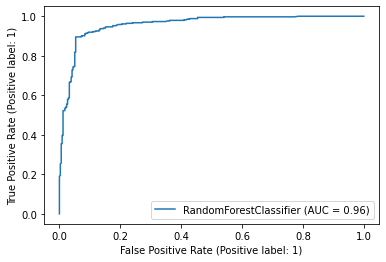

In [78]:
model_evaluation("Random Forest Classifier 90% Unlabelled Data.", model, X_test, y_test)

# 95% Unlabelled Data

In [79]:
marketing_dataset_clean()
dataset_labelled_train, dataset_labelled_test, dataset_unlabelled = segment_dataset_labelled_and_unlabelled(customer, 95)
cols = dataset_labelled_train.columns
cols = list(cols)
cols.remove("Teenhome")
cols
train_data, test_data, unlabelled_data = standard_scaling_dataset(dataset_labelled_train, dataset_labelled_test, dataset_unlabelled,cols)

In [80]:
model = RandomForestClassifier(max_depth = 15, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100, random_state = 42)
model, train_data, test_data, unlabelled_data = self_training(model, train_data, test_data, dataset_unlabelled, "Teenhome")

Train Data Length: 79
Test Data Length: 91
Unlabelled Data length: 1486
Iteration: 1, X_train Length: 79, y_train Length: 79, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 1486
Train Data Length: 89
Test Data Length: 91
Unlabelled Data length: 1476
Iteration: 1, X_train Length: 89, y_train Length: 89, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 1476
Train Data Length: 99
Test Data Length: 91
Unlabelled Data length: 1466
Iteration: 1, X_train Length: 99, y_train Length: 99, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 1466
Train Data Length: 109
Test Data Length: 91
Unlabelled Data length: 1456
Iteration: 1, X_train Length: 109, y_train Length: 109, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 1456
Train Data Length: 119
Test Data Length: 91
Unlabelled Data length: 1446
Iteration: 1, X_train Length: 119, y_train Length: 119, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 1446
Train Data Length: 

Train Data Length: 499
Test Data Length: 91
Unlabelled Data length: 1066
Iteration: 1, X_train Length: 499, y_train Length: 499, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 1066
Train Data Length: 509
Test Data Length: 91
Unlabelled Data length: 1056
Iteration: 1, X_train Length: 509, y_train Length: 509, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 1056
Train Data Length: 519
Test Data Length: 91
Unlabelled Data length: 1046
Iteration: 1, X_train Length: 519, y_train Length: 519, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 1046
Train Data Length: 529
Test Data Length: 91
Unlabelled Data length: 1036
Iteration: 1, X_train Length: 529, y_train Length: 529, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 1036
Train Data Length: 539
Test Data Length: 91
Unlabelled Data length: 1026
Iteration: 1, X_train Length: 539, y_train Length: 539, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 1026
Train Data

Train Data Length: 919
Test Data Length: 91
Unlabelled Data length: 646
Iteration: 1, X_train Length: 919, y_train Length: 919, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 646
Train Data Length: 929
Test Data Length: 91
Unlabelled Data length: 636
Iteration: 1, X_train Length: 929, y_train Length: 929, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 636
Train Data Length: 939
Test Data Length: 91
Unlabelled Data length: 626
Iteration: 1, X_train Length: 939, y_train Length: 939, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 626
Train Data Length: 949
Test Data Length: 91
Unlabelled Data length: 616
Iteration: 1, X_train Length: 949, y_train Length: 949, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 616
Train Data Length: 959
Test Data Length: 91
Unlabelled Data length: 606
Iteration: 1, X_train Length: 959, y_train Length: 959, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 606
Train Data Length: 9

Train Data Length: 1339
Test Data Length: 91
Unlabelled Data length: 226
Iteration: 1, X_train Length: 1339, y_train Length: 1339, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 226
Train Data Length: 1349
Test Data Length: 91
Unlabelled Data length: 216
Iteration: 1, X_train Length: 1349, y_train Length: 1349, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 216
Train Data Length: 1359
Test Data Length: 91
Unlabelled Data length: 206
Iteration: 1, X_train Length: 1359, y_train Length: 1359, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 206
Train Data Length: 1369
Test Data Length: 91
Unlabelled Data length: 196
Iteration: 1, X_train Length: 1369, y_train Length: 1369, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 196
Train Data Length: 1379
Test Data Length: 91
Unlabelled Data length: 186
Iteration: 1, X_train Length: 1379, y_train Length: 1379, X_test Length: 672, y_test Length: 672, unlabelled_data Length: 186
Train

For Model: Random Forest Classifier 95% Unlabelled Data.
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       337
           1       0.97      0.70      0.82       335

    accuracy                           0.84       672
   macro avg       0.87      0.84      0.84       672
weighted avg       0.87      0.84      0.84       672

ROC Curve


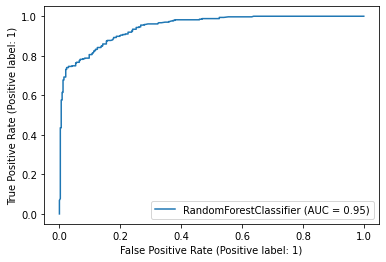

In [81]:
model_evaluation("Random Forest Classifier 95% Unlabelled Data.", model, X_test, y_test)

# Customer Intention(Imbalanced)

# Baseline Model.

In [82]:
intention = pd.read_csv("online_shoppers_intention.csv")
intention

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [83]:
cols = ['Administrative', 'ProductRelated', 'ExitRates', 'VisitorType', 'Informational', 'PageValues', 'SpecialDay', 'Revenue']
intention = intention[cols]

In [84]:
intention = pd.get_dummies(intention, columns=["VisitorType"])

In [85]:
intention

,Administrative,ProductRelated,ExitRates,Informational,PageValues,SpecialDay,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,1,0.200000,0,0.000000,0.0,False,0,0,1
1,0,2,0.100000,0,0.000000,0.0,False,0,0,1
2,0,1,0.200000,0,0.000000,0.0,False,0,0,1
3,0,2,0.140000,0,0.000000,0.0,False,0,0,1
4,0,10,0.050000,0,0.000000,0.0,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...
12325,3,53,0.029031,0,12.241717,0.0,False,0,0,1
12326,0,5,0.021333,0,0.000000,0.0,False,0,0,1
12327,0,6,0.086667,0,0.000000,0.0,False,0,0,1
12328,4,15,0.021053,0,0.000000,0.0,False,0,0,1


In [86]:
dataset_labelled_train, dataset_labelled_test = segment_dataset_labelled_and_unlabelled(intention, 0)

In [87]:
dataset_labelled_train

,Administrative,ProductRelated,ExitRates,Informational,PageValues,SpecialDay,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
8916,3,48,0.013043,0,0.000000,0.0,False,0,0,1
772,6,83,0.004916,2,2.086218,0.0,True,0,0,1
12250,1,126,0.012823,0,3.451072,0.0,False,0,0,1
7793,2,10,0.026389,0,36.672294,0.0,False,0,0,1
6601,18,168,0.013528,6,10.150644,0.0,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...
10727,0,20,0.015179,0,0.000000,0.0,False,0,0,1
3450,0,13,0.041538,0,0.000000,0.0,False,0,0,1
4591,3,29,0.033065,0,15.658084,0.0,True,0,0,1
7352,0,7,0.071429,0,0.000000,0.0,False,0,0,1


In [88]:
dataset_labelled_test

,Administrative,ProductRelated,ExitRates,Informational,PageValues,SpecialDay,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
6680,3,63,0.001587,0,1.298232,0.0,False,0,0,1
2749,3,34,0.029597,2,0.000000,0.0,False,0,0,1
8497,12,32,0.025775,2,0.000000,0.0,False,0,0,1
1849,5,8,0.030769,0,0.000000,0.0,False,0,0,1
11164,16,46,0.014488,0,0.000000,0.0,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...
11964,14,25,0.015676,0,0.000000,0.0,False,0,0,1
5191,0,14,0.015385,0,23.388000,0.0,True,0,0,1
5390,0,3,0.066667,0,0.000000,0.0,False,0,0,1
860,0,13,0.016667,0,0.000000,0.0,False,1,0,0


In [89]:
cols = dataset_labelled_train.columns
cols = list(cols)
cols.remove("Revenue")
cols

['Administrative',
 'ProductRelated',
 'ExitRates',
 'Informational',
 'PageValues',
 'SpecialDay',
 'VisitorType_New_Visitor',
 'VisitorType_Other',
 'VisitorType_Returning_Visitor']

In [90]:
train_data, test_data = standard_scaling_dataset_without_unlabelled_data(dataset_labelled_train, dataset_labelled_test, cols)

In [91]:
X_train = train_data.drop("Revenue", axis = 1)
X_test = test_data.drop("Revenue", axis = 1)

y_train = train_data["Revenue"]
y_test = test_data["Revenue"]

In [92]:
model = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = 'adaptive', solver = 'adam', random_state = 42)


For: MLP Classifier No Unlabelled Data
              precision    recall  f1-score   support

       False       0.92      0.95      0.93      3114
        True       0.66      0.56      0.61       585

    accuracy                           0.88      3699
   macro avg       0.79      0.75      0.77      3699
weighted avg       0.88      0.88      0.88      3699

ROC Curve


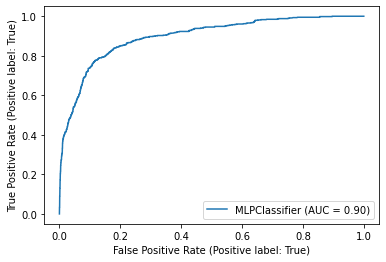



RunTime: 19.298861265182495 seconds


In [93]:
train_and_evaluate("MLP Classifier No Unlabelled Data", model, X_train, X_test, y_train, y_test)

In [94]:
def intention_dataset_clean():
    intention = pd.read_csv("online_shoppers_intention.csv")
    cols = ['Administrative', 'ProductRelated', 'ExitRates', 'VisitorType', 'Informational', 'PageValues', 'SpecialDay', 'Revenue']
    intention = intention[cols]
    intention = pd.get_dummies(intention, columns=["VisitorType"])

# 10% Unlabelled Data.

In [95]:
intention_dataset_clean()
dataset_labelled_train, dataset_labelled_test, dataset_unlabelled = segment_dataset_labelled_and_unlabelled(intention, 10)
cols = dataset_labelled_train.columns
cols = list(cols)
cols.remove("Revenue")
cols
train_data, test_data, unlabelled_data = standard_scaling_dataset(dataset_labelled_train, dataset_labelled_test, dataset_unlabelled,cols)

In [96]:
model = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = 'adaptive', solver = 'adam', random_state = 42)
model, train_data, test_data, unlabelled_data = self_training(model, train_data, test_data, dataset_unlabelled, "Revenue", k_best = 100)

Train Data Length: 7768
Test Data Length: 91
Unlabelled Data length: 863
Iteration: 1, X_train Length: 7768, y_train Length: 7768, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 863
Train Data Length: 7868
Test Data Length: 91
Unlabelled Data length: 763
Iteration: 1, X_train Length: 7868, y_train Length: 7868, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 763
Train Data Length: 7968
Test Data Length: 91
Unlabelled Data length: 663
Iteration: 1, X_train Length: 7968, y_train Length: 7968, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 663
Train Data Length: 8068
Test Data Length: 91
Unlabelled Data length: 563
Iteration: 1, X_train Length: 8068, y_train Length: 8068, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 563
Train Data Length: 8168
Test Data Length: 91
Unlabelled Data length: 463
Iteration: 1, X_train Length: 8168, y_train Length: 8168, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length:

For Model: MLP Classifier 10% Unlabelled Data.
Classification Report
              precision    recall  f1-score   support

       False       0.91      0.96      0.93      3114
        True       0.70      0.50      0.58       585

    accuracy                           0.89      3699
   macro avg       0.80      0.73      0.76      3699
weighted avg       0.88      0.89      0.88      3699

ROC Curve


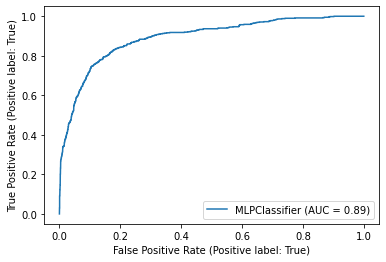

In [97]:
model_evaluation("MLP Classifier 10% Unlabelled Data.", model, X_test, y_test)

# 20% Unlabelled Data.

In [98]:
intention_dataset_clean()
dataset_labelled_train, dataset_labelled_test, dataset_unlabelled = segment_dataset_labelled_and_unlabelled(intention, 20)
cols = dataset_labelled_train.columns
cols = list(cols)
cols.remove("Revenue")
cols
train_data, test_data, unlabelled_data = standard_scaling_dataset(dataset_labelled_train, dataset_labelled_test, dataset_unlabelled,cols)

In [99]:
model = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = 'adaptive', solver = 'adam', random_state = 42)
model, train_data, test_data, unlabelled_data = self_training(model, train_data, test_data, dataset_unlabelled, "Revenue", k_best = 100)

Train Data Length: 6905
Test Data Length: 91
Unlabelled Data length: 1726
Iteration: 1, X_train Length: 6905, y_train Length: 6905, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 1726
Train Data Length: 7005
Test Data Length: 91
Unlabelled Data length: 1626
Iteration: 1, X_train Length: 7005, y_train Length: 7005, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 1626
Train Data Length: 7105
Test Data Length: 91
Unlabelled Data length: 1526
Iteration: 1, X_train Length: 7105, y_train Length: 7105, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 1526
Train Data Length: 7205
Test Data Length: 91
Unlabelled Data length: 1426
Iteration: 1, X_train Length: 7205, y_train Length: 7205, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 1426
Train Data Length: 7305
Test Data Length: 91
Unlabelled Data length: 1326
Iteration: 1, X_train Length: 7305, y_train Length: 7305, X_test Length: 3699, y_test Length: 3699, unlabelled_dat

For Model: MLP Classifier 20% Unlabelled Data.
Classification Report
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3114
        True       0.69      0.53      0.60       585

    accuracy                           0.89      3699
   macro avg       0.80      0.74      0.77      3699
weighted avg       0.88      0.89      0.88      3699

ROC Curve


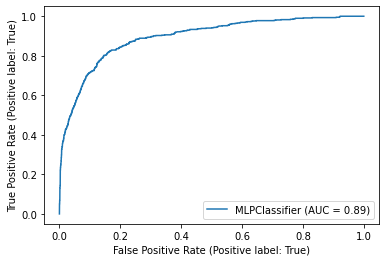

In [100]:
model_evaluation("MLP Classifier 20% Unlabelled Data.", model, X_test, y_test)

# 50% Unlabelled Data.

In [101]:
intention_dataset_clean()
dataset_labelled_train, dataset_labelled_test, dataset_unlabelled = segment_dataset_labelled_and_unlabelled(intention, 50)
cols = dataset_labelled_train.columns
cols = list(cols)
cols.remove("Revenue")
cols
train_data, test_data, unlabelled_data = standard_scaling_dataset(dataset_labelled_train, dataset_labelled_test, dataset_unlabelled,cols)

In [102]:
model = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = 'adaptive', solver = 'adam', random_state = 42)
model, train_data, test_data, unlabelled_data = self_training(model, train_data, test_data, dataset_unlabelled, "Revenue", k_best = 200)

Train Data Length: 4316
Test Data Length: 91
Unlabelled Data length: 4315
Iteration: 1, X_train Length: 4316, y_train Length: 4316, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 4315
Train Data Length: 4516
Test Data Length: 91
Unlabelled Data length: 4115
Iteration: 1, X_train Length: 4516, y_train Length: 4516, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 4115
Train Data Length: 4716
Test Data Length: 91
Unlabelled Data length: 3915
Iteration: 1, X_train Length: 4716, y_train Length: 4716, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 3915
Train Data Length: 4916
Test Data Length: 91
Unlabelled Data length: 3715
Iteration: 1, X_train Length: 4916, y_train Length: 4916, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 3715
Train Data Length: 5116
Test Data Length: 91
Unlabelled Data length: 3515
Iteration: 1, X_train Length: 5116, y_train Length: 5116, X_test Length: 3699, y_test Length: 3699, unlabelled_dat

For Model: MLP Classifier 50% Unlabelled Data.
Classification Report
              precision    recall  f1-score   support

       False       0.92      0.94      0.93      3114
        True       0.64      0.54      0.59       585

    accuracy                           0.88      3699
   macro avg       0.78      0.74      0.76      3699
weighted avg       0.87      0.88      0.88      3699

ROC Curve


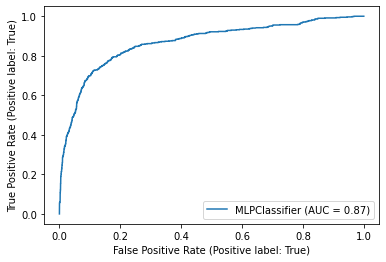

In [103]:
model_evaluation("MLP Classifier 50% Unlabelled Data.", model, X_test, y_test)

# 90% Unlabelled Data.

In [104]:
intention_dataset_clean()
dataset_labelled_train, dataset_labelled_test, dataset_unlabelled = segment_dataset_labelled_and_unlabelled(intention, 90)
cols = dataset_labelled_train.columns
cols = list(cols)
cols.remove("Revenue")
cols
train_data, test_data, unlabelled_data = standard_scaling_dataset(dataset_labelled_train, dataset_labelled_test, dataset_unlabelled,cols)

In [105]:
model = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = 'adaptive', solver = 'adam', random_state = 42)
model, train_data, test_data, unlabelled_data = self_training(model, train_data, test_data, dataset_unlabelled, "Revenue", k_best = 500)

Train Data Length: 864
Test Data Length: 91
Unlabelled Data length: 7767
Iteration: 1, X_train Length: 864, y_train Length: 864, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 7767
Train Data Length: 1364
Test Data Length: 91
Unlabelled Data length: 7267
Iteration: 1, X_train Length: 1364, y_train Length: 1364, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 7267
Train Data Length: 1864
Test Data Length: 91
Unlabelled Data length: 6767
Iteration: 1, X_train Length: 1864, y_train Length: 1864, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 6767
Train Data Length: 2364
Test Data Length: 91
Unlabelled Data length: 6267
Iteration: 1, X_train Length: 2364, y_train Length: 2364, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 6267
Train Data Length: 2864
Test Data Length: 91
Unlabelled Data length: 5767
Iteration: 1, X_train Length: 2864, y_train Length: 2864, X_test Length: 3699, y_test Length: 3699, unlabelled_data L

For Model: MLP Classifier 90% Unlabelled Data.
Classification Report
              precision    recall  f1-score   support

       False       0.92      0.95      0.93      3114
        True       0.67      0.56      0.61       585

    accuracy                           0.89      3699
   macro avg       0.80      0.76      0.77      3699
weighted avg       0.88      0.89      0.88      3699

ROC Curve


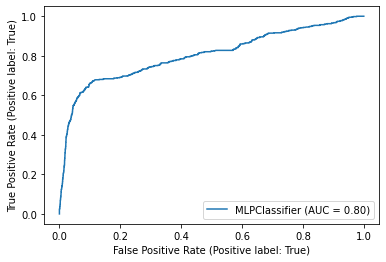

In [106]:
model_evaluation("MLP Classifier 90% Unlabelled Data.", model, X_test, y_test)

# 95% Unlabelled Data.

In [107]:
intention_dataset_clean()
dataset_labelled_train, dataset_labelled_test, dataset_unlabelled = segment_dataset_labelled_and_unlabelled(intention, 95)
cols = dataset_labelled_train.columns
cols = list(cols)
cols.remove("Revenue")
cols
train_data, test_data, unlabelled_data = standard_scaling_dataset(dataset_labelled_train, dataset_labelled_test, dataset_unlabelled,cols)

In [108]:
model = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = 'adaptive', solver = 'adam', random_state = 42)
model, train_data, test_data, unlabelled_data = self_training(model, train_data, test_data, dataset_unlabelled, "Revenue", k_best = 500)

Train Data Length: 432
Test Data Length: 91
Unlabelled Data length: 8199
Iteration: 1, X_train Length: 432, y_train Length: 432, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 8199
Train Data Length: 932
Test Data Length: 91
Unlabelled Data length: 7699
Iteration: 1, X_train Length: 932, y_train Length: 932, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 7699
Train Data Length: 1432
Test Data Length: 91
Unlabelled Data length: 7199
Iteration: 1, X_train Length: 1432, y_train Length: 1432, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 7199
Train Data Length: 1932
Test Data Length: 91
Unlabelled Data length: 6699
Iteration: 1, X_train Length: 1932, y_train Length: 1932, X_test Length: 3699, y_test Length: 3699, unlabelled_data Length: 6699
Train Data Length: 2432
Test Data Length: 91
Unlabelled Data length: 6199
Iteration: 1, X_train Length: 2432, y_train Length: 2432, X_test Length: 3699, y_test Length: 3699, unlabelled_data Leng

For Model: MLP Classifier 95% Unlabelled Data.
Classification Report
              precision    recall  f1-score   support

       False       0.93      0.93      0.93      3114
        True       0.61      0.61      0.61       585

    accuracy                           0.88      3699
   macro avg       0.77      0.77      0.77      3699
weighted avg       0.88      0.88      0.88      3699

ROC Curve


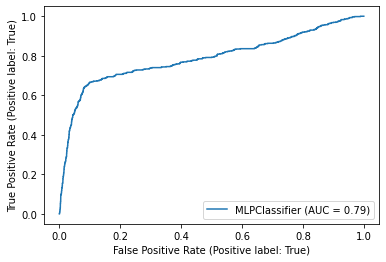

In [109]:
model_evaluation("MLP Classifier 95% Unlabelled Data.", model, X_test, y_test)